# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.885 ,  0.1378,  0.535 ,  0.5666,  0.6375,  0.9925,  0.3713,  0.6601,  0.6156,  0.7555,
        0.6895,  0.4024,  0.7472,  0.4625,  0.9013,  0.5381,  0.2426,  0.2261,  0.8626,  0.5557,
        0.0989,  0.1475,  0.2807,  0.4938,  0.2302,  0.3631,  0.507 ,  0.341 ,  0.5978,  0.5998])

In [6]:
y

array([ 10.655 ,   8.4134,   9.6049,   9.6999,   9.9124,  10.9776,   9.1139,   9.9804,   9.8469,
        10.2666,  10.0686,   9.2072,  10.2417,   9.3874,  10.704 ,   9.6144,   8.7278,   8.6784,
        10.5878,   9.6671,   8.2966,   8.4426,   8.8421,   9.4815,   8.6907,   9.0894,   9.5211,
         9.0229,   9.7933,   9.7995])

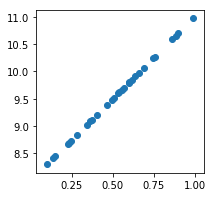

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1086

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [13]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

KeyError: u'ffmpeg'